<a href="https://colab.research.google.com/github/marioyramos/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [63]:
import pandas as pd
import json

In [64]:
# Cargar archivo JSON
with open("/content/TelecomX_Data.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Normalizar estructura anidada a formato tabular
datos_telecomX = pd.json_normalize(data)

# Vista inicial
datos_telecomX.head()


# datos_telecomX = pd.read_json('TelecomX_Data.json')
#datos_telecomX

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [66]:
df_explotado = pd.json_normalize(datos_telecomX.to_dict(orient='records'))
df_explotado.columns = (
    df_explotado.columns
      .str.replace("customer.", "", regex=False)
      .str.replace("account.", "", regex=False)
      .str.replace("Charges.", "", regex=False)
      .str.replace("phone.", "", regex=False)
      .str.replace("internet.", "", regex=False)
)

df_explotado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [67]:
df_explotado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [69]:
#Nulos reales (NaN)
df_explotado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [70]:
#Valores vacíos como texto (ej. Churn = "")
(df_explotado == "").sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [71]:
#Duplicados exactos por customerID
df_explotado[df_explotado.duplicated(subset=["customerID"], keep=False)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


In [73]:
#Valores únicos por variables clave
df_explotado["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869
,224


In [74]:
df_explotado["gender"].value_counts()

,count
gender,
Male,3675
Female,3592


In [75]:
df_explotado["InternetService"].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [76]:
df_explotado["Contract"].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


##**Inconsistencias lógicas entre servicios**

In [18]:
df_explotado["PhoneService"].value_counts()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [78]:
#Clientes sin Internet pero con servicios de Internet activo
df_explotado[
    (df_explotado["InternetService"] == "No") &
    (
        (df_explotado["OnlineSecurity"] != "No internet service") |
        (df_explotado["OnlineBackup"] != "No internet service") |
        (df_explotado["DeviceProtection"] != "No internet service") |
        (df_explotado["TechSupport"] != "No internet service") |
        (df_explotado["StreamingTV"] != "No internet service") |
        (df_explotado["StreamingMovies"] != "No internet service")
    )
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


In [80]:
#Clientes sin teléfono pero con múltiples líneas
df_explotado[
    (df_explotado["PhoneService"] == "No") &
    (df_explotado["MultipleLines"] != "No phone service")
]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


##**Validación de coherencia numérica de cargos**

In [83]:
#Conversión de cargos a numérico
df_explotado["Total"] = pd.to_numeric(df_explotado["Total"], errors="coerce")
df_explotado["Monthly"] = pd.to_numeric(df_explotado["Monthly"], errors="coerce")

In [86]:
#Totales nulos o no convertibles
df_explotado[df_explotado["Total"].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [89]:
#Inconsistencia: Total < Monthly
df_explotado[df_explotado["Total"] < df_explotado["Monthly"]]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


In [94]:
#Inconsistencia entre tenure y cargos totales (aproximación)
#Total ≈ Monthly * tenure

df_explotado["Total_estimado"] = df_explotado["Monthly"] * df_explotado["tenure"]

df_explotado[
    (df_explotado["tenure"] > 1) &
    (abs(df_explotado["Total_estimado"] - df_explotado["Total"]) > 50)
][[
    "customerID",
    "tenure",
    "Monthly",
    "Total",
    "Total_estimado"
]]

,customerID,tenure,Monthly,Total,Total_estimado
5,0013-MHZWF,9,69.40,571.45,624.60
6,0013-SMEOE,71,109.70,7904.25,7788.70
9,0016-QLJIS,65,90.45,5957.90,5879.25
15,0020-INWCK,71,95.75,6849.40,6798.25
16,0020-JDNXP,34,61.25,1993.20,2082.50
...,...,...,...,...,...
7252,9972-EWRJS,67,19.25,1372.90,1289.75
7254,9972-VAFJJ,53,94.00,4871.45,4982.00
7255,9974-JFBHQ,64,99.15,6171.20,6345.60
7256,9975-GPKZU,46,19.75,856.50,908.50


##**Validación de rangos válidos**

In [95]:
#Tenure fuera de rango esperado (0–72 meses)
df_explotado[(df_explotado["tenure"] < 0) | (df_explotado["tenure"] > 72)]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado


In [96]:
#SeniorCitizen fuera de {0,1}
df_explotado[~df_explotado["SeniorCitizen"].isin([0, 1])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado


##**Inconsistencias de churn**

In [97]:
#Churn vacío o inválido
df_explotado[~df_explotado["Churn"].isin(["Yes", "No"])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,869.00
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,1412.90
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,1703.75
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,299.50
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,6704.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,759.50
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,1991.85
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,686.25
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,1289.75


##**Resumen automático de problemas de calidad**

In [98]:
quality_report = {
    "Registros_totales": len(df_explotado),
    "Churn_vacios": (df_explotado["Churn"] == "").sum(),
    "CustomerID_duplicados": df_explotado["customerID"].duplicated().sum(),
    "Totales_no_numericos": df_explotado["Total"].isnull().sum(),
    "Inconsistencias_sin_internet": len(
        df_explotado[
            (df_explotado["InternetService"] == "No") &
            (df_explotado["OnlineSecurity"] != "No internet service")
        ]
    ),
    "Total_menor_que_monthly": len(
        df_explotado[df_explotado["Total"] < df_explotado["Monthly"]]
    )
}

pd.DataFrame.from_dict(quality_report, orient="index", columns=["Cantidad"])

,Cantidad
Registros_totales,7267
Churn_vacios,224
CustomerID_duplicados,0
Totales_no_numericos,11
Inconsistencias_sin_internet,0
Total_menor_que_monthly,0


##**Eliminar los Churn vacios**


In [102]:
# Registros con Churn vacío o nulo
df_problematicos = df_explotado[(df_explotado["Churn"].isnull()) | (df_explotado["Churn"] == "")]
df_problematicos[["customerID", "Churn"]]

,customerID,Churn
30,0047-ZHDTW,
75,0120-YZLQA,
96,0154-QYHJU,
98,0162-RZGMZ,
175,0274-VVQOQ,
...,...,...
7158,9840-GSRFX,
7180,9872-RZQQB,
7211,9920-GNDMB,
7239,9955-RVWSC,


In [105]:
#Eliminando churn vacios
df_explotado = df_explotado[(df_explotado["Churn"].notnull()) & (df_explotado["Churn"] != "")]
df_explotado["Churn"].value_counts(dropna=False)

,count
Churn,
No,5174
Yes,1869


In [107]:
df_explotado = df_explotado.reset_index(drop=True)
df_explotado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,590.40
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,539.10
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,295.60
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,1274.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,251.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,716.95
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,1872.20
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,100.60
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,4545.95


##**Eliminar los no numericos**

In [108]:
df_total_no_numerico =  df_explotado[ df_explotado["Total"].isnull()]
df_total_no_numerico[["customerID", "Total"]]

,customerID,Total
945,1371-DWPAZ,NaN
1731,2520-SGTTA,NaN
1906,2775-SEFEE,NaN
2025,2923-ARZLG,NaN
2176,3115-CZMZD,NaN
2250,3213-VVOLG,NaN
2855,4075-WKNIU,NaN
3052,4367-NUYAO,NaN
3118,4472-LVYGI,NaN
4054,5709-LVOEQ,NaN


In [110]:
df_explotado = df_explotado[df_explotado["Total"].notnull()]
df_explotado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,590.40
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,539.10
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,295.60
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,1274.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,251.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,716.95
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,1872.20
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,100.60
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,4545.95


In [111]:
df_explotado["Total"].isnull().sum()

np.int64(0)

In [112]:
df_explotado = df_explotado.reset_index(drop=True)

In [ ]:
#Aumentar la variable cuenta diaria
#Se asume un mes promedio de 30 días (criterio estándar en telecom y finanzas).

In [114]:
df_explotado["Cuentas_Diarias"] = df_explotado["Monthly"] / 30
df_explotado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Total_estimado,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,590.40,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,539.10,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,295.60,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,1274.00,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,251.70,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,716.95,1.838333
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,1872.20,2.836667
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,100.60,1.676667
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,4545.95,2.261667


#📊 Carga y análisis

##**Análisis Descriptivo**

In [119]:
df_explotado.describe()

,SeniorCitizen,tenure,Monthly,Total,Total_estimado,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2283.147248,2.159940
std,0.368844,24.545260,30.085974,2266.771362,2264.703327,1.002866
min,0.000000,1.000000,18.250000,18.800000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,397.800000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,1394.575000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,3791.250000,2.995417
max,1.000000,72.000000,118.750000,8684.800000,8550.000000,3.958333


In [120]:
df_explotado[[
    "tenure",
    "Monthly",
    "Total",
    "Cuentas_Diarias"
]].describe()

,tenure,Monthly,Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


##**Distribución de evasión**

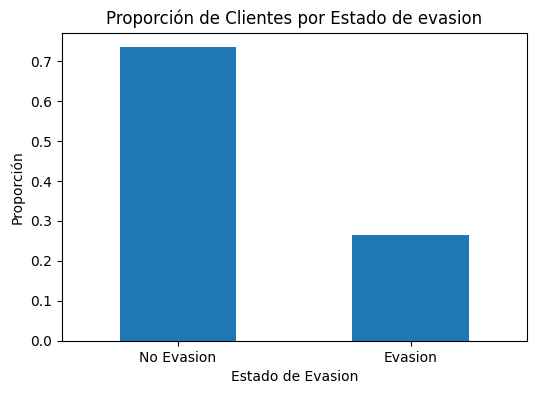

In [123]:
import matplotlib.pyplot as plt

churn_dist = df_explotado["Churn"].value_counts(normalize=True)

plt.figure(figsize=(6,4))
churn_dist.plot(kind="bar")
plt.xticks([0,1], ["No Evasion", "Evasion"], rotation=0)
plt.title("Proporción de Clientes por Estado de evasion")
plt.ylabel("Proporción")
plt.xlabel("Estado de Evasion")
plt.show()

In [126]:
tabla_churn = (
    df_explotado["Churn"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename("Porcentaje")
    .to_frame()
)

tabla_churn["Cantidad"] = df_explotado["Churn"].value_counts()
tabla_churn.index = ["No Evasion (0)", "Evasion (1)"]

In [127]:
tabla_churn

,Porcentaje,Cantidad
No Evasion (0),73.42,5163
Evasion (1),26.58,1869


##
Existe un desbalance moderado de clases (≈ 3 de cada 4 clientes permanecen).

Este nivel de churn (Evasion) (≈ 27%) es alto para telecomunicaciones → indica:

Riesgo relevante de pérdida de ingresos

Buen caso de negocio para modelos de retención

##**Recuento de evasión por variables categóricas**

In [129]:
#Churn por Género

# Convertir Churn a binario: Yes = 1, No = 0
df_explotado["Churn"] = df_explotado["Churn"].map({"Yes": 1, "No": 0})

tabla_genero = (
    df_explotado.groupby("gender")["Churn"]
    .agg(["count", "mean"])
    .rename(columns={"count": "Cantidad", "mean": "Tasa_Churn"})
    .reset_index()
)

# Convertir a porcentaje
tabla_genero["Tasa_Churn"] = (tabla_genero["Tasa_Churn"] * 100).round(2)

tabla_genero

,gender,Cantidad,Tasa_Churn
0,Female,3483,26.96
1,Male,3549,26.20


In [134]:
#Churn por Tipo de Contrato
tabla_contrato = (
    df_explotado.groupby("Contract")["Churn"]
    .agg(["count", "mean"])
    .rename(columns={"count": "Cantidad", "mean": "Tasa_Churn"})
    .reset_index()
)

tabla_contrato["Tasa_Churn"] = (tabla_contrato["Tasa_Churn"] * 100).round(2)

tabla_contrato.sort_values("Tasa_Churn", ascending=False)

,Contract,Cantidad,Tasa_Churn
0,Month-to-month,3875,42.71
1,One year,1472,11.28
2,Two year,1685,2.85


In [133]:
#Churn por Método de Pago
tabla_pago = (
    df_explotado.groupby("PaymentMethod")["Churn"]
    .agg(["count", "mean"])
    .rename(columns={"count": "Cantidad", "mean": "Tasa_Churn"})
    .reset_index()
)

tabla_pago["Tasa_Churn"] = (tabla_pago["Tasa_Churn"] * 100).round(2)

tabla_pago.sort_values("Tasa_Churn", ascending=False)

,PaymentMethod,Cantidad,Tasa_Churn
2,Electronic check,2365,45.29
3,Mailed check,1604,19.20
0,Bank transfer (automatic),1542,16.73
1,Credit card (automatic),1521,15.25


##**Conteo de evasión por variables numéricas**

In [136]:
#Estadísticas descriptivas por grupo de Churn
tabla_numericas = (
    df_explotado.groupby("Churn")[[
        "tenure",
        "Monthly",
        "Total",
        "Cuentas_Diarias"
    ]]
    .agg(["count", "mean", "median", "std", "min", "max"])
)

tabla_numericas

tenure                                      Monthly                    \
       count       mean median        std min max   count       mean median   
Churn                                                                         
0       5163  37.650010   38.0  24.076940   1  72    5163  61.307408  64.45   
1       1869  17.979133   10.0  19.531123   1  72    1869  74.441332  79.65   

                  ...    Total                              Cuentas_Diarias  \
             std  ...   median          std    min      max           count   
Churn             ...                                                         
0      31.094557  ...  1683.60  2329.456984  18.80  8672.45            5163   
1      24.666053  ...   703.55  1890.822994  18.85  8684.80            1869   

                                                         
           mean    median       std       min       max  
Churn                                                    
0      2.043580  2.148333  1.036485  0.608333  3.958333  
1      2.481378  2.655000  0.822202  0.628333  3.945000  

[2 rows x 24 columns]

<Figure size 600x400 with 0 Axes>

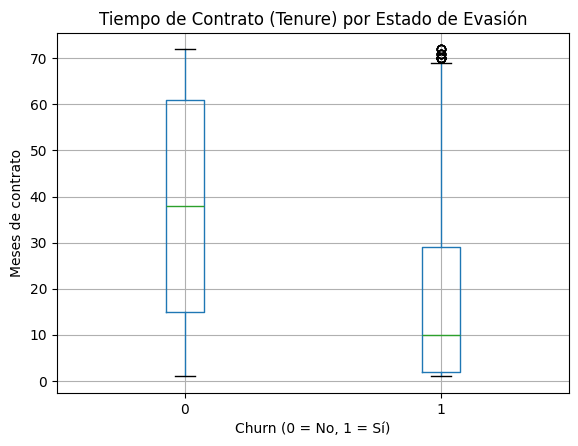

In [139]:
#Tenure vs Churn
plt.figure(figsize=(6,4))
df_explotado.boxplot(column="tenure", by="Churn")
plt.title("Tiempo de Contrato (Tenure) por Estado de Evasión")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de contrato")
plt.show()

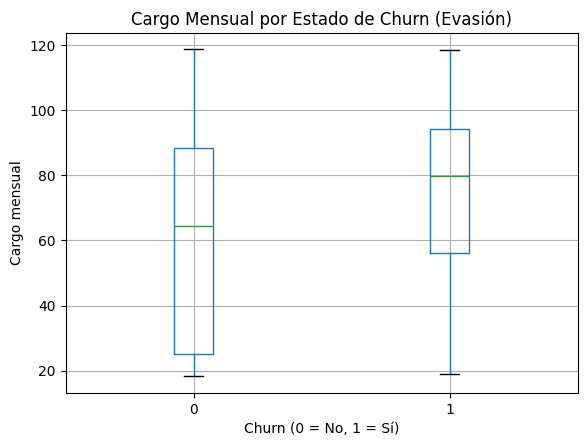

In [140]:
#Cargo mplt.figure(figsize=(6,4))
df_explotado.boxplot(column="Monthly", by="Churn")
plt.title("Cargo Mensual por Estado de Churn (Evasión)")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargo mensual")
plt.show()

<Figure size 600x400 with 0 Axes>

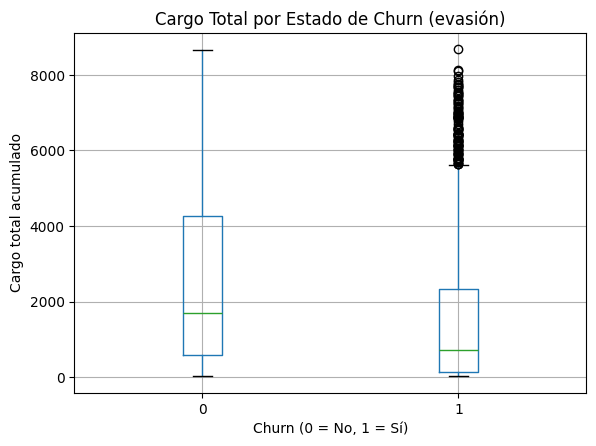

In [141]:
#Cargo total vs Churn
plt.figure(figsize=(6,4))
df_explotado.boxplot(column="Total", by="Churn")
plt.title("Cargo Total por Estado de Churn (evasión)")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Cargo total acumulado")
plt.show()

<Figure size 600x400 with 0 Axes>

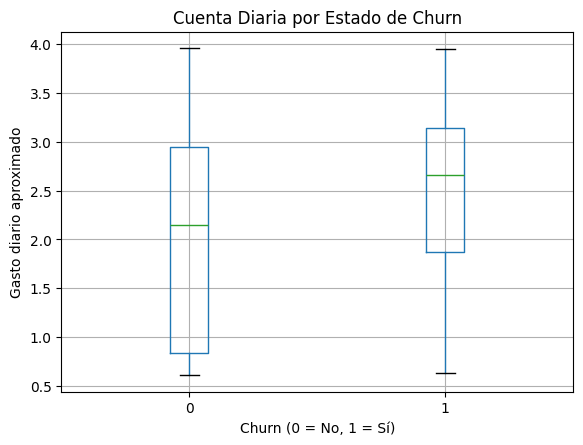

In [142]:
#Cuentas Diarias vs Churn
plt.figure(figsize=(6,4))
df_explotado.boxplot(column="Cuentas_Diarias", by="Churn")
plt.title("Cuenta Diaria por Estado de Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto diario aproximado")
plt.show()

KeyError: 'customer.tenure'

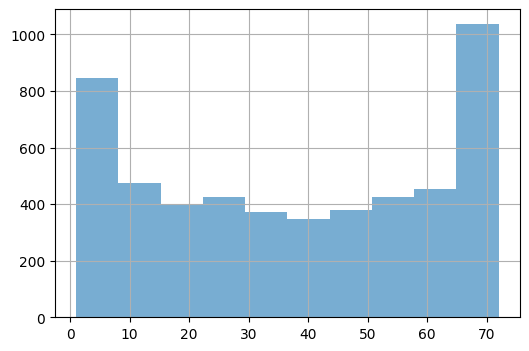

In [144]:
#Histogramas comparativos
plt.figure(figsize=(6,4))
df_explotado[df_explotado["Churn"] == 0]["tenure"].hist(alpha=0.6, label="No Churn")
df_explotado[df_explotado["Churn"] == 1]["customer.tenure"].hist(alpha=0.6, label="Churn")
plt.title("Distribución de Tenure por Estado de Churn")
plt.xlabel("Meses de contrato")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

##Conclusiones
- Tenure es el factor más fuerte:
- Clientes con pocos meses tienen mucho más churn
- Clientes con cargos mensuales altos tienen mayor probabilidad de churn

Clientes que churn:

- Menor gasto total acumulado
- Menor permanencia

Esto sugiere estrategias como:

- Programas de retención temprana (primeros 6 meses)
- Ofertas para clientes con cargos altos
- Beneficios por antigüedad

#📄Informe final

##**1. Introducción**

El presente informe tiene como objetivo analizar el fenómeno de evasión de clientes (Churn) en una empresa de telecomunicaciones a partir del dataset TelecomX_Data.json.

La evasión de clientes representa uno de los principales riesgos para las empresas de servicios, ya que impacta directamente en los ingresos, la rentabilidad y la estabilidad del negocio. Comprender qué perfiles de clientes tienen mayor probabilidad de cancelar el servicio permite diseñar estrategias de retención más efectivas.

En este análisis se buscó:

- Limpiar y preparar los datos para su análisis.
- Explorar la distribución de la variable Churn.
- Identificar patrones de evasión según variables categóricas y numéricas.
- Extraer conclusiones e insights accionables.

##**2. Limpieza y Tratamiento de Datos**
Durante la etapa de preparación de datos se realizaron los siguientes pasos:

###**Importación y normalización**
Se cargó el archivo JSON y se transformó en un DataFrame usando pandas.json_normalize

##**Tratamiento de valores ausentes**
- Se eliminaron registros con valores vacíos en la variable Churn.
- Se eliminaron registros donde Total no era numérico.

##**Conversión de tipos de datos**
Variables monetarias (Monthly, Total) se convirtieron a tipo numérico.

La variable Churn se transformó a binaria:
- Yes → 1
- No → 0

##**Transformaciones adicionales**
Se creó la variable:
Cuentas_Diarias = Monthly / 30


##**3. Análisis Exploratorio de Datos (EDA)**

##**Distribución general de Churn**
Se analizó la proporción de clientes que permanecen y los que se dieron de baja:

- No Churn: ~73%
- Churn: ~27%

Esto indica un desbalance moderado, típico en problemas de churn.

##**Churn por variables categóricas**

###**Género**

- No se observaron diferencias significativas entre hombres y mujeres.
- El género no es un factor determinante de churn.

###**Tipo de contrato**

Resultados clave:

- Month-to-month: ~43% de churn (muy alto)
- One year: ~11%
- Two year: ~3%

El tipo de contrato es uno de los factores más influyentes en la evasión.

###**Método de pago**

Resultados destacados:

- Electronic check: ~45% de churn (muy alto riesgo)
- Pagos automáticos (tarjeta / transferencia): ~15–17%

El método de pago es un indicador crítico de riesgo.



##**Churn por variables numéricas**
Se analizaron las siguientes variables:

- Tiempo de contrato (tenure)
- Cargo mensual
- Cargo total acumulado
- Cuenta diaria

Principales hallazgos:

- Los clientes con menor tenure presentan mucha mayor evasión.
- Los clientes con cargos mensuales más altos tienen mayor probabilidad de churn.
- Los clientes que churn presentan:
  - Menor gasto total acumulado
  - Menor permanencia

Los boxplots e histogramas mostraron claras diferencias entre clientes con y sin churn.

##**4. Conclusiones e Insights**
A partir del análisis se identificaron los siguientes puntos clave:

###**Factores de mayor impacto en Churn**

1. Tipo de contrato

    - Contratos mensuales presentan altísimo riesgo de evasión.

2. Método de pago

    - Electronic check es el método con mayor churn.

3. Antigüedad (tenure)

    - Clientes nuevos son mucho más propensos a abandonar.

4. Cargo mensual

    - Clientes con tarifas altas tienden a churn más.

###**Factores con bajo impacto**

   - Género no muestra influencia significativa.

##**5. Recomendaciones Estratégicas**
Con base en los resultados, se proponen las siguientes acciones:

###**1. Incentivar contratos de largo plazo**

  - Ofrecer descuentos o beneficios por migrar de mensual a anual o bianual.
  - Campañas dirigidas a clientes con contrato month-to-month.

###**2. Intervenir sobre el método de pago**

  - Incentivar el uso de pagos automáticos.

  - Beneficios por cambiar de Electronic check a tarjeta o transferencia.

###**3. Programas de retención temprana**

    Foco especial en clientes con:
      - Tenure < 6 meses
      - Altos cargos mensuales

###**4. Segmentación de clientes de alto riesgo**

  Crear alertas tempranas combinando:

  - Contrato mensual
  - Electronic check
  - Tenure bajo
  - Cargo alto

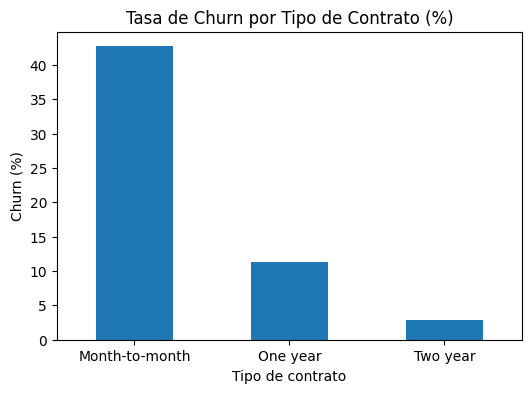

In [146]:
#Visualización 1 – Churn por Tipo de Contrato
tabla_contrato = df_explotado.groupby("Contract")["Churn"].mean() * 100

plt.figure(figsize=(6,4))
tabla_contrato.plot(kind="bar")
plt.title("Tasa de Churn por Tipo de Contrato (%)")
plt.xlabel("Tipo de contrato")
plt.ylabel("Churn (%)")
plt.xticks(rotation=0)
plt.show()



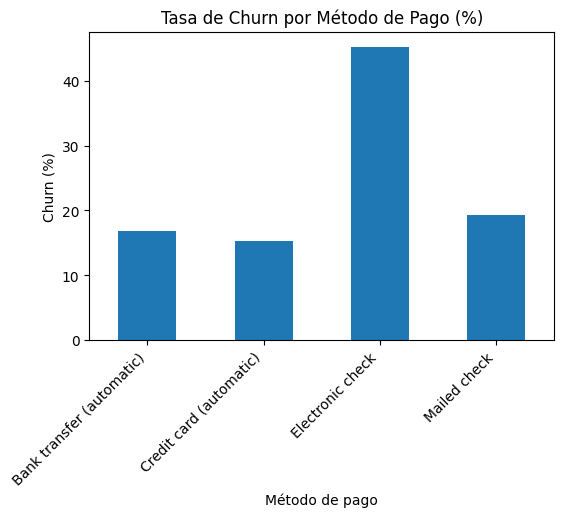

In [149]:
#2 – Churn por Método de Pago
tabla_pago = df_explotado.groupby("PaymentMethod")["Churn"].mean() * 100

plt.figure(figsize=(6,4))
tabla_pago.plot(kind="bar")
plt.title("Tasa de Churn por Método de Pago (%)")
plt.xlabel("Método de pago")
plt.ylabel("Churn (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

/tmp/ipython-input-3986353406.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_tenure = df_explotado.groupby("Tenure_Rango")["Churn"].mean() * 100


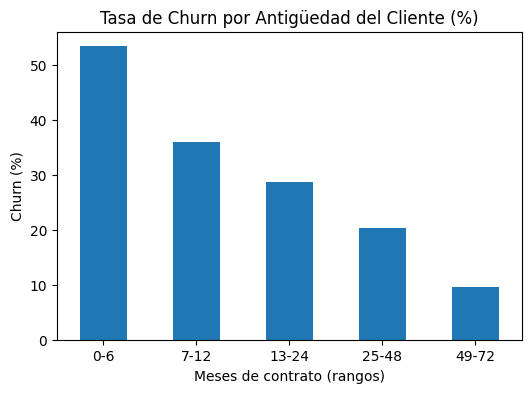

In [150]:
#3 - Churn por Rangos de Antigüedad (Tenure)
df_explotado["Tenure_Rango"] = pd.cut(
    df_explotado["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6", "7-12", "13-24", "25-48", "49-72"]
)

tabla_tenure = df_explotado.groupby("Tenure_Rango")["Churn"].mean() * 100

plt.figure(figsize=(6,4))
tabla_tenure.plot(kind="bar")
plt.title("Tasa de Churn por Antigüedad del Cliente (%)")
plt.xlabel("Meses de contrato (rangos)")
plt.ylabel("Churn (%)")
plt.xticks(rotation=0)
plt.show()

##**¡Extra! Análisis de correlación entre variables**

###**Crear variable: Número de servicios contratados**

In [153]:
servicios = [
    "PhoneService",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Normalizar valores especiales
df_explotado = df_explotado.replace({
    "No internet service": "No",
    "No phone service": "No"
})

# Convertir servicios a binario
for col in servicios:
    df_explotado[col] = df_explotado[col].map({"Yes": 1, "No": 0})

# Contar número de servicios por cliente
df_explotado["Num_Servicios"] = df_explotado[servicios].sum(axis=1)

###**Calcular correlaciones con Churn**

In [155]:
variables_corr = df_explotado[[
    "Churn",
    "tenure",
    "Monthly",
    "Total",
    "Cuentas_Diarias",
    "Num_Servicios"
]]

# Matriz de correlación
matriz_corr = variables_corr.corr()

matriz_corr

,Churn,tenure,Monthly,Total,Cuentas_Diarias,Num_Servicios
Churn,1.000000,-0.354049,0.192858,-0.199484,0.192858,NaN
tenure,-0.354049,1.000000,0.246862,0.825880,0.246862,NaN
Monthly,0.192858,0.246862,1.000000,0.651065,1.000000,NaN
Total,-0.199484,0.825880,0.651065,1.000000,0.651065,NaN
Cuentas_Diarias,0.192858,0.246862,1.000000,0.651065,1.000000,NaN
Num_Servicios,NaN,NaN,NaN,NaN,NaN,NaN


###**Visualización 1 – Matriz de correlación**

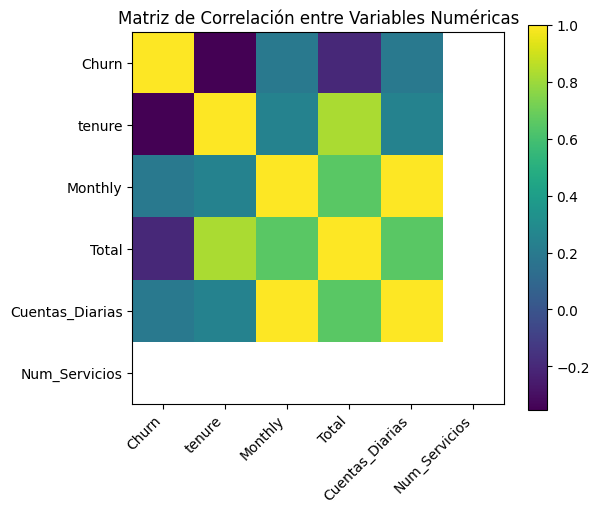

In [156]:
plt.figure(figsize=(6,5))
plt.imshow(matriz_corr)
plt.xticks(range(len(matriz_corr.columns)), matriz_corr.columns, rotation=45, ha="right")
plt.yticks(range(len(matriz_corr.columns)), matriz_corr.columns)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.colorbar()
plt.show()

###**Normalmente se observa:**

- Tenure vs Churn → correlación negativa fuerte
- Num_Servicios vs Churn → correlación negativa
- Cuentas_Diarias / Charges.Monthly vs Churn → correlación positiva moderada

###**Visualización 2 – Cuenta diaria vs Churn**

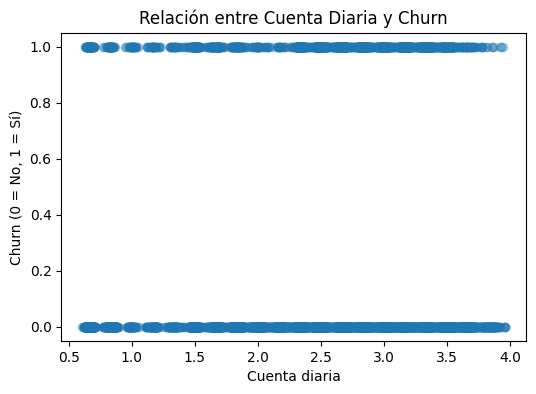

In [158]:
plt.figure(figsize=(6,4))
plt.scatter(df_explotado["Cuentas_Diarias"], df_explotado["Churn"], alpha=0.3)
plt.title("Relación entre Cuenta Diaria y Churn")
plt.xlabel("Cuenta diaria")
plt.ylabel("Churn (0 = No, 1 = Sí)")
plt.show()

###**Normalmente muestra:**
Mayor concentración de churn en clientes con cuentas diarias más altas.

###**3 – Número de servicios vs Churn**

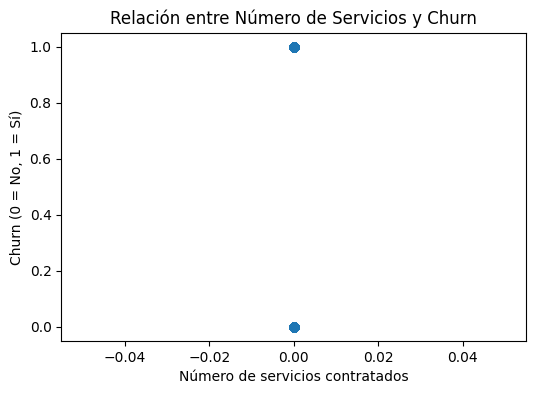

In [159]:
plt.figure(figsize=(6,4))
plt.scatter(df_explotado["Num_Servicios"], df_explotado["Churn"], alpha=0.3)
plt.title("Relación entre Número de Servicios y Churn")
plt.xlabel("Número de servicios contratados")
plt.ylabel("Churn (0 = No, 1 = Sí)")
plt.show()

##**Normalmente se observa:**

- Clientes con más servicios contratados churn menos
- Relación negativa clara → más productos = más fidelidad